In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os

import cv2
#import mediapipe as mp
from IPython.display import display, Image

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
!pip install requests

In [ ]:
import requests
model_filename = "model_v0_train.keras"
response = requests.get("https://raw.githubusercontent.com/Jensdboc/ISP/master/model_v0_train_20/model_v0_train.keras")

with open(model_filename, 'wb') as model_file:
    model_file.write(response.content)

In [ ]:
!unzip "/content/drive/MyDrive/train.zip"

Archive:  /content/drive/MyDrive/train.zip
replace train/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [54]:
!unzip "/content/drive/MyDrive/test2.zip"

Archive:  /content/drive/MyDrive/test2.zip
   creating: test2/Potato___Early_blight/
  inflating: test2/.DS_Store         
  inflating: __MACOSX/test2/._.DS_Store  
   creating: test2/Apple___Cedar_apple_rust/
   creating: test2/Tomato___Early_blight/
   creating: test2/Corn_(maize)___Common_rust_/
   creating: test2/Tomato___healthy/
   creating: test2/Tomato___Tomato_Yellow_Leaf_Curl_Virus/
   creating: test2/Apple___Apple_scab/
   creating: test2/Potato___healthy/
  inflating: test2/Potato___Early_blight/.DS_Store  
  inflating: __MACOSX/test2/Potato___Early_blight/._.DS_Store  
  inflating: test2/Potato___Early_blight/TomatoEarlyBlight5.JPG  
  inflating: __MACOSX/test2/Potato___Early_blight/._TomatoEarlyBlight5.JPG  
  inflating: test2/Potato___Early_blight/PotatoEarlyBlight4.JPG  
  inflating: __MACOSX/test2/Potato___Early_blight/._PotatoEarlyBlight4.JPG  
  inflating: test2/Potato___Early_blight/PotatoEarlyBlight5.JPG  
  inflating: __MACOSX/test2/Potato___Early_blight/._PotatoE

In [ ]:
from tensorflow import keras

model = keras.models.load_model(model_filename)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
!pip install opencv-python

In [ ]:
# Initialize the camera
cap = cv2.VideoCapture(0)  # 0 indicates the default camera (you can change this number if you have multiple cameras)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Process the frame (e.g., resize, normalize, etc.) as needed
    processed_frame = cv2.resize(frame, (256, 256))
    processed_frame = np.expand_dims(processed_frame, axis=0)
    print(type(processed_frame))
    predictions = model.predict(processed_frame)
    c = np.argmax(predictions, axis=1)
    text = classes[int(c)]
    print(text)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.0
    font_thickness = 2
    color = (128, 0, 128)
    position = (10, 30)  # Coordinates (x, y) of the upper left corner

    # Add text to the image
    cv2.putText(frame, text, position, font, font_scale, color, font_thickness)

    cv2.imshow('Camera Feed', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the window
cap.release()
cv2.destroyAllWindows()

In [71]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
    "/content/validation",
    target_size=(256, 256),
    batch_size=10,
    class_mode='sparse'  # Assuming a classification task
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/content/test2",
    target_size=(256, 256),
    batch_size=10,
    class_mode='sparse'  # Assuming a classification task
)

classes = list(generator.class_indices.keys())

Found 3800 images belonging to 38 classes.
Found 33 images belonging to 38 classes.


In [74]:
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
classes_wrong = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

for i, x in enumerate(classes):
  print(classes_wrong[i] + " SHOULD BE INSTEAD " + classes[i])

Apple___Apple_scab SHOULD BE INSTEAD Apple___Apple_scab
Apple___Black_rot SHOULD BE INSTEAD Apple___Black_rot
Apple___Cedar_apple_rust SHOULD BE INSTEAD Apple___Cedar_apple_rust
Apple___healthy SHOULD BE INSTEAD Apple___healthy
Blueberry___healthy SHOULD BE INSTEAD Blueberry___healthy
Cherry_(including_sour)___healthy SHOULD BE INSTEAD Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___Powdery_mildew SHOULD BE INSTEAD Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot SHOULD BE INSTEAD Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_ SHOULD BE INSTEAD Corn_(maize)___Common_rust_
Corn_(maize)___healthy SHOULD BE INSTEAD Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___Northern_Leaf_Blight SHOULD BE INSTEAD Corn_(maize)___healthy
Grape___Black_rot SHOULD BE INSTEAD Grape___Black_rot
Grape___Esca_(Black_Measles) SHOULD BE INSTEAD Grape___Esca_(Black_Measles)
Grape___healthy SHOULD BE INSTEAD Grape___Leaf_bli

In [70]:
import os
for x in classes:
  if not os.path.exists("/content/test2/" + x):
    os.mkdir("/content/test2/" + x)

In [67]:
evaluation = model.evaluate(generator)
labels = generator.labels
print(labels)
print("Validation Loss:", evaluation[0])

380/380 [==============================] - 48s 127ms/step - loss: 0.0640 - accuracy: 0.9768
[ 0  0  0 ... 37 37 37]
Validation Loss: 0.06396234780550003


In [73]:
evaluation = model.evaluate(test_generator)

4/4 [==============================] - 0s 90ms/step - loss: 0.6622 - accuracy: 0.8788


1/1 [==============================] - 0s 106ms/step


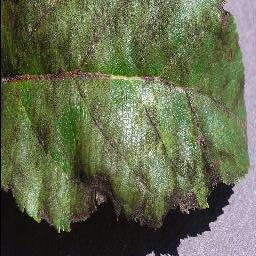

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


In [ ]:
path = "/content/test/AppleScab3.JPG"

image = tf.io.read_file(path)
image = tf.image.decode_image(image, channels=3)  # Channels=3 for RGB images
image = tf.image.resize(image, [256, 256])  # Resize to match model input size
image = image / 255.0  # Normalize
image = tf.expand_dims(image, axis=0)  # Add batch dimension if needed

predictions = model.predict(image)
c = np.argmax(predictions, axis=1)
display(Image(path))
# print(predictions)
# print(c)
print(classes[int(c)])